In [2]:
from train_wrapper import ALIKEDTrainWrapper
from dataset_synthetic import ALIKEDSyntheticDataset

/home/ivan/FRI/2024-2025/sem2/dl/project/refactor/imc24lightglue/lightglue.py:24: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [4]:
dataset = ALIKEDSyntheticDataset(
    poses_csv="/home/ivan/FRI/2024-2025/sem2/dl/project/image-matching-challenge-2024/train/train_labels.csv",
    root_dir="/home/ivan/FRI/2024-2025/sem2/dl/project/image-matching-challenge-2024/train",
    image_size=(640, 640)
)

Loaded 2148 valid images for synthetic warping


In [5]:
dataset[100].keys()

dict_keys(['image0', 'image1', 'warp01_params', 'warp10_params', 'scene', 'image_name0', 'image_name1'])

In [6]:
dataset[0]['image0'].shape

selected_img_indx = 123

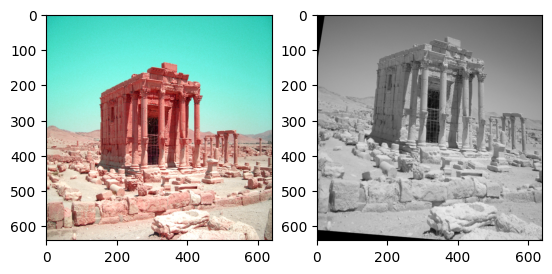

In [7]:
training_pair = dataset[selected_img_indx]

img_0 = dataset[selected_img_indx]['image0']
img_1 = dataset[selected_img_indx]['image1']


img_0_numpy = img_0.numpy().transpose(1, 2, 0)  # Convert from CHW to HWC format
img_1_numpy = img_1.numpy().transpose(1, 2, 0)


  # Convert from CHW to HWC format
img_0_numpy = (img_0_numpy * 255).astype('uint8')  # Convert to uint8
img_1_numpy = (img_1_numpy * 255).astype('uint8')  # Convert to uint8
# img_0 = img_0.numpy()
# img_1 = img_1.numpy()
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.imshow(img_0_numpy)
plt.subplot(1, 2, 2)
plt.imshow(img_1_numpy)
plt.show()


In [8]:
from torch.utils.data import DataLoader
dataloader = DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    num_workers=4,
    pin_memory=True
)

# take dataloader instance at selected_img_indx
for i, batch in enumerate(dataloader):
    if i == selected_img_indx:
        training_pair = batch
        break

/home/ivan/FRI/2024-2025/sem2/dl/project/myenv/lib/python3.11/site-packages/torch/utils/data/dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [9]:
train_wrapper = ALIKEDTrainWrapper(weights='./imc24lightglue/weights/aliked-n16.pth',
                                   debug=True)

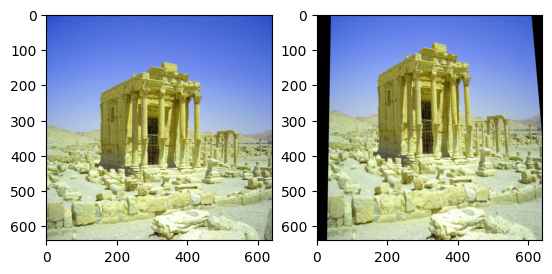

In [10]:
img_0_numpy = training_pair['image0'][0].detach().cpu().numpy().transpose(1, 2, 0)
img_1_numpy = training_pair['image1'][0].detach().cpu().numpy().transpose(1, 2, 0)

img_0_numpy = (img_0_numpy * 255).astype('uint8')  # Convert to uint8
img_1_numpy = (img_1_numpy * 255).astype('uint8')  # Convert to uint8

plt.subplot(1, 2, 1)
plt.imshow(img_0_numpy)
plt.subplot(1, 2, 2)
plt.imshow(img_1_numpy)

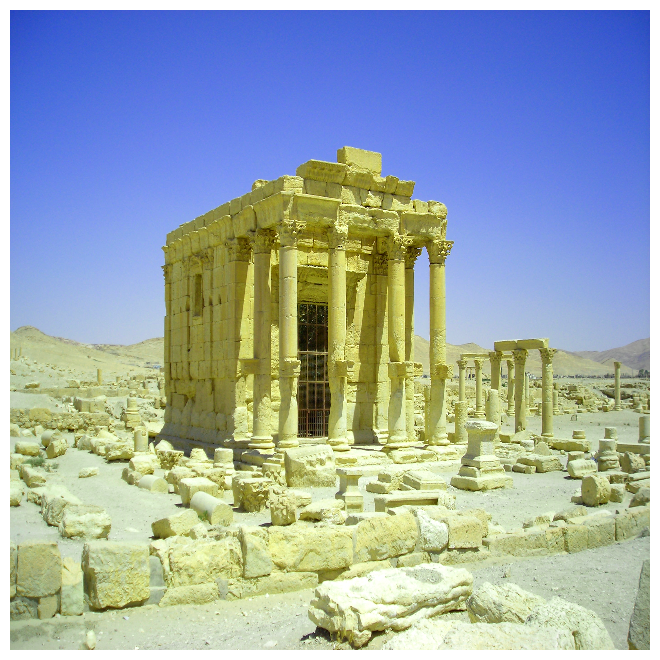

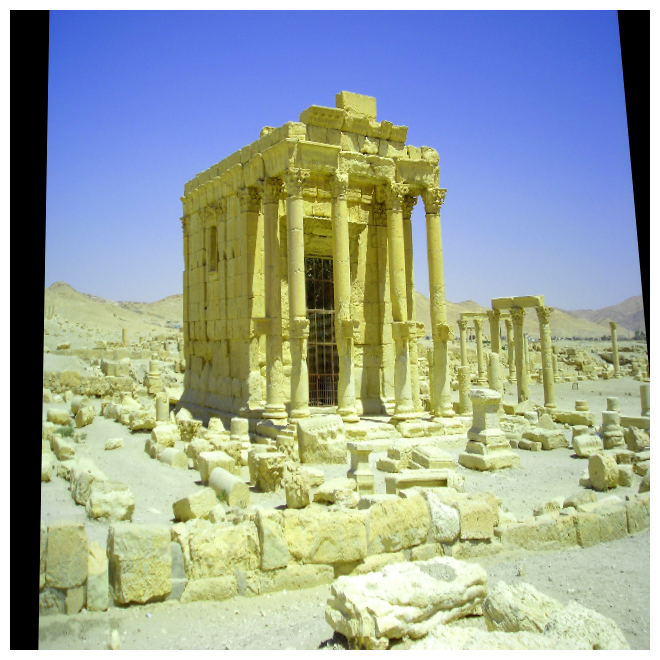

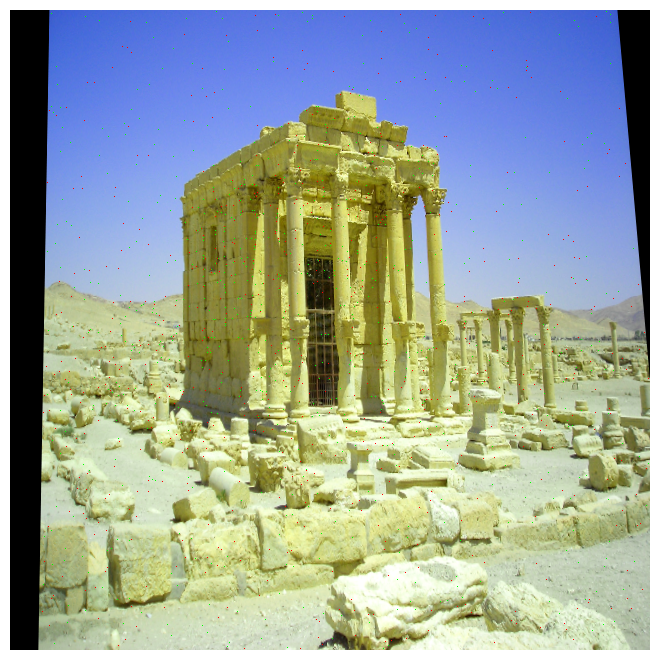

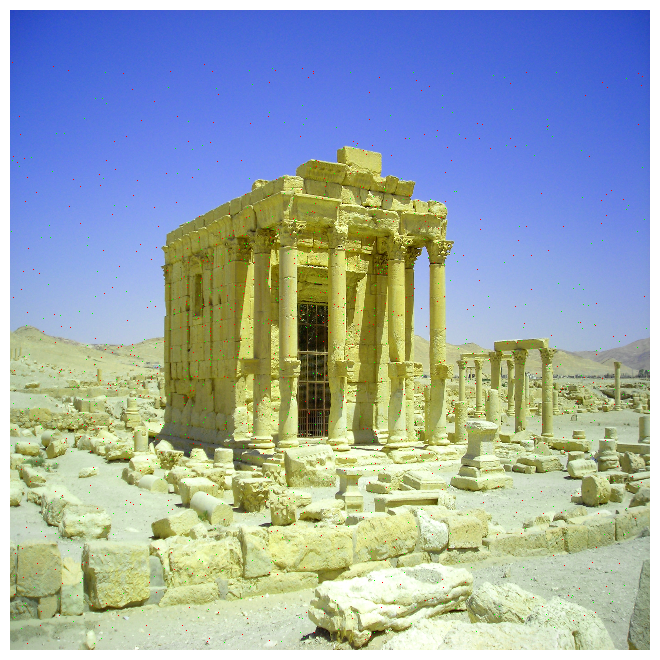

In [ ]:
pred0 = train_wrapper.forward_train(training_pair['image0'])
pred1 = train_wrapper.forward_train(training_pair['image1'])

correspondances, pred0_with_rand, pred1_with_rand = train_wrapper.compute_correspondence(pred0, pred1, training_pair)